# Fraud Detection: Imbalanced Classification Solution

This notebook solves the fraud detection question step by step using `fraud.csv`.

## a. Report the Imbalance Ratio
- Calculate and print the ratio of minority to majority class.

Imbalance ratio (minority/majority): 0.057
Class
0    4731
1     269
Name: count, dtype: int64


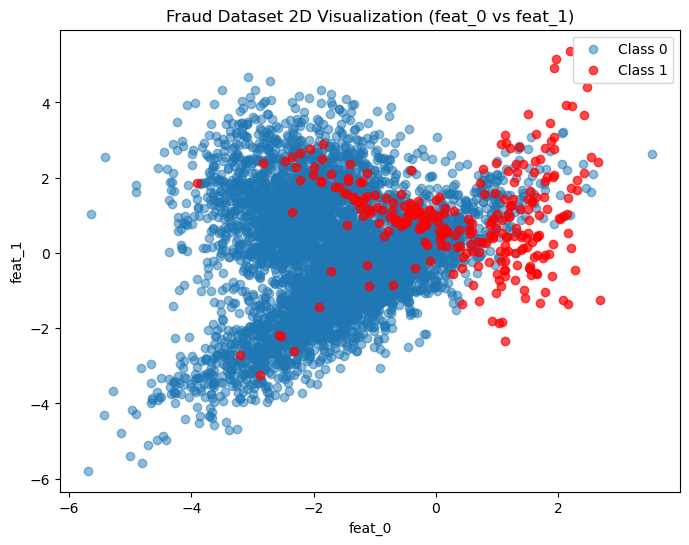

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./fraud.csv')


# Imbalance ratio calculation
counts = df['Class'].value_counts()
imbalance_ratio = counts.min() / counts.max()
print(f'Imbalance ratio (minority/majority): {imbalance_ratio:.3f}')
print(counts)

# 2D visualization using two features
plt.figure(figsize=(8,6))
plt.scatter(df[df['Class']==0]['feat_0'], df[df['Class']==0]['feat_1'], alpha=0.5, label='Class 0')
plt.scatter(df[df['Class']==1]['feat_0'], df[df['Class']==1]['feat_1'], alpha=0.7, label='Class 1', color='red')


plt.xlabel('feat_0')
plt.ylabel('feat_1')
plt.title('Fraud Dataset 2D Visualization (feat_0 vs feat_1)')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Prepare features and target
X = df[[f'feat_{i}' for i in range(13)]]
y = df['Class']

# Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('\nRandom Forest Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Logistic Regression Results:
Accuracy: 0.969
Precision: 0.96
Recall: 0.4444444444444444
F1 Score: 0.6075949367088608
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       946
           1       0.96      0.44      0.61        54

    accuracy                           0.97      1000
   macro avg       0.96      0.72      0.80      1000
weighted avg       0.97      0.97      0.96      1000


Random Forest Results:
Accuracy: 0.974
Precision: 0.9375
Recall: 0.5555555555555556
F1 Score: 0.6976744186046512
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       946
           1       0.94      0.56      0.70        54

    accuracy                           0.97      1000
   macro avg       0.96      0.78      0.84      1000
weighted avg       0.97      0.97      0.97      1000


Random Forest Results:
Accuracy: 0.974
Precision: 0.9375
Recall: 0

Both models have high overall accuracy, but this is driven by the majority class (non-fraud).

Random Forest outperforms Logistic Regression in recall and F1-score for the minority class (fraud), meaning it catches more frauds.

Recall is low for both models, showing the challenge of detecting minority class in imbalanced datasets.

Next steps:
Apply rebalancing techniques (under-sampling, over-sampling, SMOTE, Tomek links) to improve recall and F1-score for fraud detection.

In [9]:
# Rebalancing techniques for class imbalance
# Reason: Imbalanced data leads to poor recall for minority class. Rebalancing helps models learn minority patterns.
# Ratio: We'll balance to a 1:1 ratio for demonstration.
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random under-sampling of majority class
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Random over-sampling of minority class
ros = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Tomek links (removes ambiguous samples near class boundary)
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)

print('Shapes after rebalancing:')
print('Under-sampling:', X_rus.shape, y_rus.value_counts().to_dict())
print('Over-sampling:', X_ros.shape, y_ros.value_counts().to_dict())
print('SMOTE:', X_smote.shape, y_smote.value_counts().to_dict())
print('Tomek Links:', X_tl.shape, y_tl.value_counts().to_dict())

Shapes after rebalancing:
Under-sampling: (430, 13) {0: 215, 1: 215}
Over-sampling: (7570, 13) {0: 3785, 1: 3785}
SMOTE: (7570, 13) {0: 3785, 1: 3785}
Tomek Links: (3979, 13) {0: 3764, 1: 215}


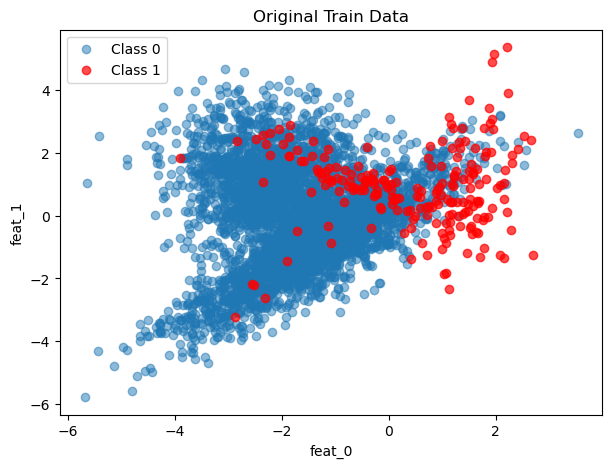

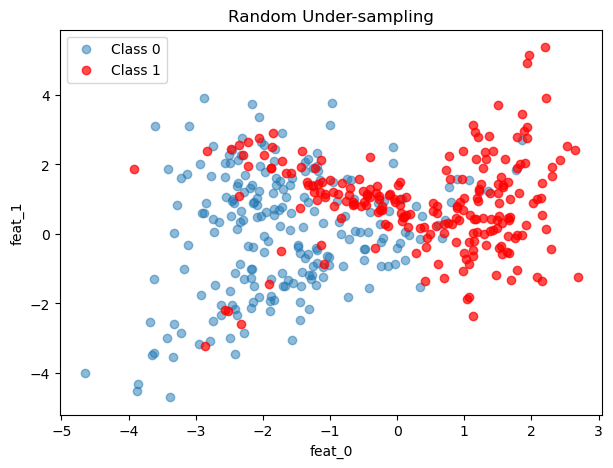

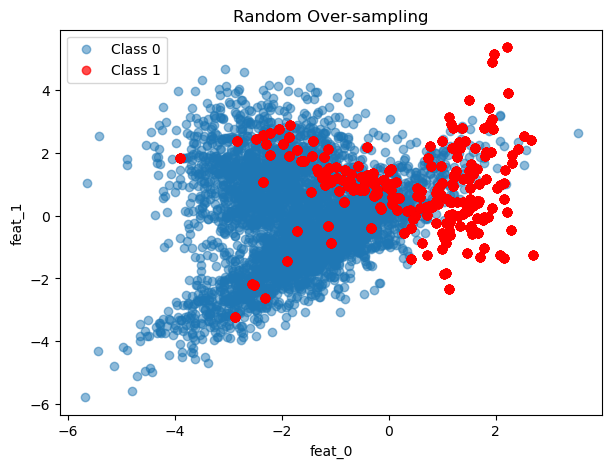

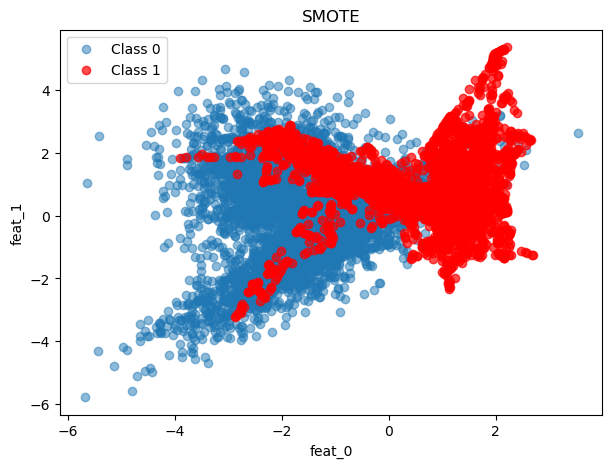

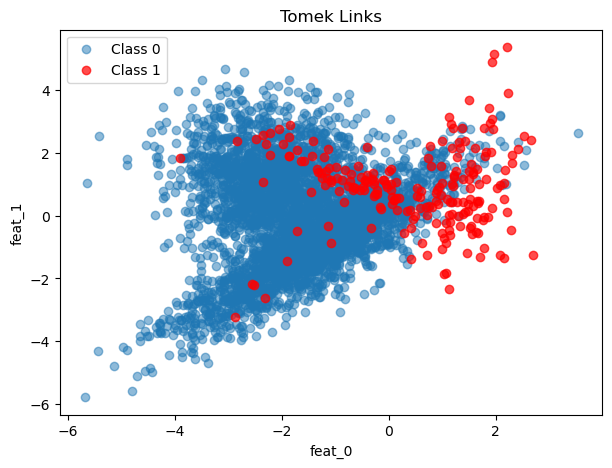

In [10]:
import matplotlib.pyplot as plt

def plot_2d(X, y, title):
    if hasattr(X, 'values'):
        X = X.values
    plt.figure(figsize=(7,5))
    plt.scatter(X[y==0][:,0], X[y==0][:,1], alpha=0.5, label='Class 0')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], alpha=0.7, label='Class 1', color='red')
    plt.xlabel('feat_0')
    plt.ylabel('feat_1')
    plt.title(title)
    plt.legend()
    plt.show()

# Visualize original train data
plot_2d(X_train, y_train, 'Original Train Data')
# Visualize after random under-sampling
plot_2d(X_rus, y_rus, 'Random Under-sampling')
# Visualize after random over-sampling
plot_2d(X_ros, y_ros, 'Random Over-sampling')
# Visualize after SMOTE
plot_2d(X_smote, y_smote, 'SMOTE')
# Visualize after Tomek Links
plot_2d(X_tl, y_tl, 'Tomek Links')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def train_and_report(X_res, y_res, X_test, y_test, scaler=None):
    if scaler:
        X_res_scaled = scaler.fit_transform(X_res)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_res_scaled = X_res
        X_test_scaled = X_test
        
    clf = LogisticRegression()
    clf.fit(X_res_scaled, y_res)
    y_pred = clf.predict(X_test_scaled)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

print('Random Under-sampling:')
train_and_report(X_rus, y_rus, X_test, y_test, scaler)
print('\nRandom Over-sampling:')
train_and_report(X_ros, y_ros, X_test, y_test, scaler)
print('\nSMOTE:')
train_and_report(X_smote, y_smote, X_test, y_test, scaler)
print('\nTomek Links:')
train_and_report(X_tl, y_tl, X_test, y_test, scaler)

print("\nCompare these results to your baseline model above. Typically, recall and F1-score for the minority class should improve after rebalancing, but watch for overfitting or loss of majority class accuracy.")

Random Under-sampling:
Accuracy: 0.876
Precision: 0.27564102564102566
Recall: 0.7962962962962963
F1 Score: 0.4095238095238095
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       946
           1       0.28      0.80      0.41        54

    accuracy                           0.88      1000
   macro avg       0.63      0.84      0.67      1000
weighted avg       0.95      0.88      0.90      1000


Random Over-sampling:
Accuracy: 0.88
Precision: 0.2857142857142857
Recall: 0.8148148148148148
F1 Score: 0.4230769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       946
           1       0.29      0.81      0.42        54

    accuracy                           0.88      1000
   macro avg       0.64      0.85      0.68      1000
weighted avg       0.95      0.88      0.91      1000


SMOTE:
Accuracy: 0.885
Precision: 0.28965517241

In [12]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_metrics(X_res, y_res, X_test, y_test, scaler=None):
    if scaler:
        X_res_scaled = scaler.fit_transform(X_res)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_res_scaled = X_res
        X_test_scaled = X_test
    clf = LogisticRegression()
    clf.fit(X_res_scaled, y_res)
    y_pred = clf.predict(X_test_scaled)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

results = {}
results['Baseline'] = get_metrics(X_train, y_train, X_test, y_test, scaler)
results['Under-sampling'] = get_metrics(X_rus, y_rus, X_test, y_test, scaler)
results['Over-sampling'] = get_metrics(X_ros, y_ros, X_test, y_test, scaler)
results['SMOTE'] = get_metrics(X_smote, y_smote, X_test, y_test, scaler)
results['Tomek Links'] = get_metrics(X_tl, y_tl, X_test, y_test, scaler)

results_df = pd.DataFrame(results).T
print(results_df)


                Accuracy  Precision    Recall        F1
Baseline           0.969   0.960000  0.444444  0.607595
Under-sampling     0.876   0.275641  0.796296  0.409524
Over-sampling      0.880   0.285714  0.814815  0.423077
SMOTE              0.885   0.289655  0.777778  0.422111
Tomek Links        0.970   0.961538  0.462963  0.625000
